<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Iris_Dropout_Regularzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [122]:
##################################Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset


# Import data & Data preperation for the Model  

In [123]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [124]:
#convert features into tensor
data=torch.tensor(df[df.columns[0:4]].values).float()
#Target is Species..lets convert them into numeric data
labels=torch.zeros(len(data),dtype=torch.long)
labels[df.species=='versicolor']=1
labels[df.species=='virginica']=2
#labels

# Split Data using Sklearn as Data Loader

In [125]:
#Split data[features] and labels[targets] using sklearn in 80% : 20%
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.2)

#Convert them into Pytorch datasets
train_data=TensorDataset(train_data,train_label)
test_data=TensorDataset(test_data,test_label)

#Load them using dataloader in batches
batch_sizes=16
train_loader=DataLoader(train_data,batch_size=batch_sizes,shuffle=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])


In [126]:
test_data.tensors[0].shape

torch.Size([30, 4])

# Create The Model & Train the Model

## Class Buleprint

In [127]:
class theNewModel(nn.Module):

  #Intialization
  def __init__(self,dropoutRate):
    super().__init__() ###????
  
    ##Layers
    self.input=nn.Linear(4,12)
    self.hidden=nn.Linear(12,12)
    self.output=nn.Linear(12,3)

    #Parameters
    self.dr=dropoutRate
    
    #Initializations is over here..Backing into class
  
  #Forward Pass
  def forward(self,x):

    #Input
    x=F.relu(self.input(x))#  See first self.input(x) which is Linear..then Relu is applied
    x=F.dropout(x,p=self.dr,training=self.training)# Dropout is getting aplied on x with rate dropoutRate & switching on Dropout

    #Hidden
    x=F.relu(self.hidden(x))#  See first self.input(x) which is Linear..then Relu is applied
    x=F.dropout(x,p=self.dr,training=self.training)# Dropout is getting aplied on x with rate dropoutRate & switching on Dropout

    #Output
    x=self.output(x)

    #return
    return x
    





In [128]:
# #test the Model for Syntax error
# tmpnet=theNewModel(.25)
# tmpdata=torch.randn((10,4))
# yHat=tmpnet(tmpdata)
# yHat

## Define/ Create Model

In [129]:
######Create the ANN Model
def createANNModel(dropoutrate):

  #New Instance of Model class
  ANNclass=theNewModel(dropoutrate)

  #Lossfunction
  lossfunc=nn.CrossEntropyLoss()

  #Optimizer
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.005)

  #Return
  return ANNclass,lossfunc,optimizer

## Train Model

In [130]:
#########Train The Model

#Number of Epochs
numepochs=500

#Model for Training
def trainModel():

  #Accuracy in each epoch
  trainacc=[]
  testacc=[]
  for epochi in range(numepochs):


    

    #Start Training---Switch on Learning
    ANNclass.train()

    ########Start training Batches
    #Initialize Accuracy for each batch
    batchacc=[]
    #2nd Loop for Batches
    for X,y in train_loader:

      #Fowrad pass and loss
      yHat=ANNclass(X)
      loss=lossfunc(yHat,y)

      #Backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #Calculate Bacth Accuracy for each epoch and store
      batchacc.append(100*torch.mean(((torch.argmax(yHat,axis=1))==y).float()))
      
    

    ##End of Batch Loop...Traing is completed...going back to first loop for Training summery & Evaluation

    

    #Mean of Batch accuracy is the train accuracy
    trainacc.append(np.mean(batchacc))

    #Evaluation
    ANNclass.eval()  #tetsing starts here

    #Test the whole testing data
    X,y=next(iter(test_loader))
    
    predlabels=torch.argmax(ANNclass(X),axis=1)
    #Test Accuracy
    testacc.append(100*torch.mean((predlabels==y).float()))

    #End of epoch loop which is our first Loop...Back into class

  #return the class function
  return trainacc,testacc


# Now Lets Run the Model with appropriate Parameters

In [131]:
#Lets provide dropout rate
dropoutrate=.0

#call the Create function
ANNclass,lossfunc,optimizer=createANNModel(dropoutrate)
#call the Training & Evaluation Module
trainacc,testacc=trainModel()


# Plot the Results

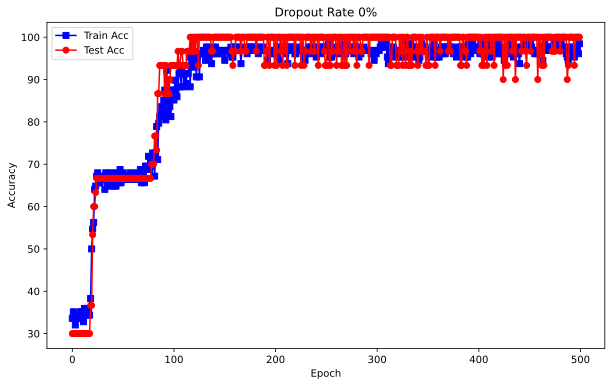

In [132]:
fig=plt.figure(figsize=(10,6))

plt.plot(trainacc,'bs-')
plt.plot(testacc,'ro-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Acc','Test Acc'])
plt.title('Dropout Rate %g%%'%dropoutrate)
plt.show();

# Run An Experiment

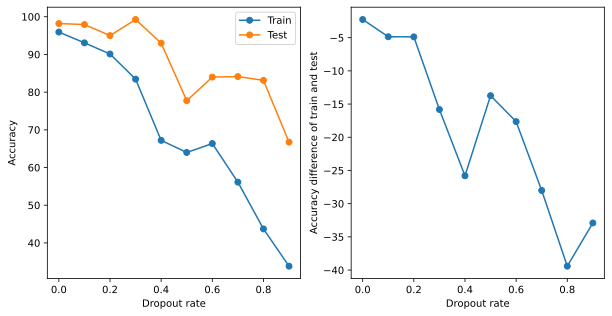

In [138]:
dropoutrate=np.arange(10)/10
#Store trainacc and test acc
results=np.zeros((len(dropoutrate),2))



for di in range(len(dropoutrate)):
  #call the Create function
  ANNclass,lossfunc,optimizer=createANNModel(dropoutrate[di])
  #call the Training & Evaluation Module
  trainacc,testacc=trainModel()
  #Store accuracies
  results[di,0]=np.mean(trainacc[-50:])
  results[di,1]=np.mean(testacc[-50:])

fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(dropoutrate,results,'o-')
ax[0].set_xlabel('Dropout rate')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train','Test'])


ax[1].plot(dropoutrate,-np.diff(results,axis=1),'o-')
ax[1].set_xlabel('Dropout rate')
ax[1].set_ylabel('Accuracy difference of train and test')

plt.show()
